In [1]:
import random
import numpy as np
import math
import matplotlib.pyplot as plt

In [2]:
a = 0.06
points_1 = []
points_2 = []
intersection_points = []
N = 50
alphas = []

In [3]:
def points(N):
    for i in range(N):
        x_1 = np.random.uniform(0, 1)
        y_1 = np.random.uniform(0, 1)
        points_1.append((x_1, y_1))
        
        alpha_value = np.random.uniform(0, 2 * np.pi)
        alphas.append(alpha_value)

        x_2 = x_1 + a * np.cos(alpha_value)
        y_2 = y_1 + a * np.sin(alpha_value)

        points_2.append((x_2, y_2))

In [4]:
points(N)

In [5]:
def plot_lines(N):
    # Define custom colors
    line_color = 'steelblue'
    marker_color = 'none'

    # Define marker style for data points
    marker_style = 'o'
    marker_size = 8

    # Calculate plot limits
    x_min = min(min(points_1[i][0], points_2[i][0]) for i in range(N))
    x_max = max(max(points_1[i][0], points_2[i][0]) for i in range(N))
    y_min = min(min(points_1[i][1], points_2[i][1]) for i in range(N))
    y_max = max(max(points_1[i][1], points_2[i][1]) for i in range(N))

    # Set figure size
    plt.figure(figsize=(8, 6))

    for i in range(N):
        # Plot lines between points
        plt.plot([points_1[i][0], points_2[i][0]], [points_1[i][1], points_2[i][1]], linestyle='-', color=line_color)

        # Plot data points without markers
        plt.scatter(points_1[i][0], points_1[i][1], marker=marker_style, s=marker_size, color=marker_color)
        plt.scatter(points_2[i][0], points_2[i][1], marker=marker_style, s=marker_size, color=marker_color)

    # Customize grid
    plt.grid(True, linestyle='dotted', linewidth=0.5, color='gray')

    # Set labels and title
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.title('Lines between Points')

    # Adjust plot limits
    plt.xlim(0, 1)
    plt.ylim(0, 1)

    # Display the plot
    plt.show()


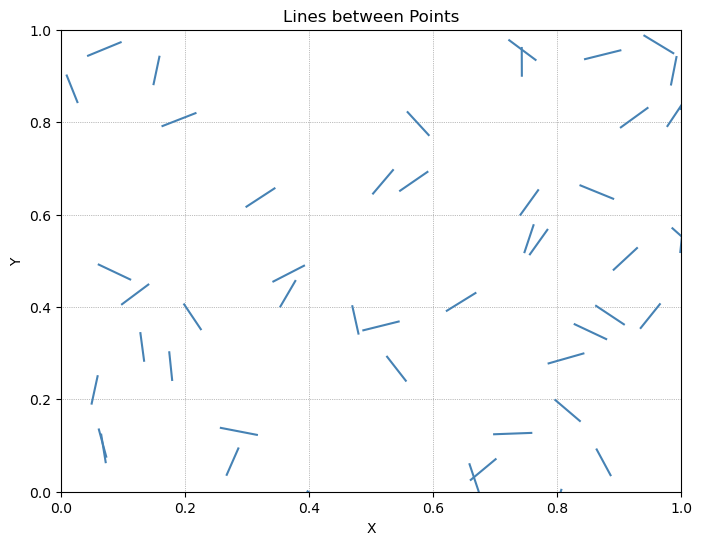

In [6]:
plot_lines(N)

### Regions 
Region I
x ∈ [0, a/2]
y ∈ [-sqrt(a**2 - (x-a)**2) + a, a]
x ∈[0,a/2] and y ∈ [-sqrt(a**2 - (x-a)**2) + a, a]
tetha ∈ [arctan((a - y)/(a - x)), π/2 + arctan(x/(a - y))]
⁠

------

Region II
x ∈ [0, a/2]
y ∈ [-sqrt(a**2 - x**2) + a, -sqrt(a**2 - (x - a)**2) + a]
tetha ∈ [arcsin((a - y)/a), π/2 + arctan(x/(a - y))]

-----

Region III
x ∈ [0, a/2]
y ∈ [0, -sqrt((a**2 - x**2)) + a]
tetha ∈ [arcsin((a - y)/a), π - arcsin((a - y)/a)]

------
Region IV
x ∈ [0, a]
y ∈ [0, sqrt(a**2 - (x - a)**2)]
tetha ∈ [arctan(y/(a - x)), π - arccos((a - x)/x)]


In [7]:
def is_point_inside_region_1(x, y, theta, a):
    # Check if x ∈ [0, a/2]
    if x < 0 or x > a/2:
        return False

    # Calculate the bounds for y based on x
    y_lower_bound = -math.sqrt(a**2 - (x - a)**2) + a
    y_upper_bound = a

    # Check if y ∈ [-sqrt(a**2 - (x-a)**2) + a, a]
    if y < y_lower_bound or y > y_upper_bound:
        return False

    # Calculate the bounds for theta based on x and y
    theta_lower_bound = math.atan((a - y) / (a - x))
    theta_upper_bound = math.pi/2 + math.atan(x / (a - y))

    # Normalize theta to be in the range [0, 2π)
    normalized_theta = theta % (2 * math.pi)

    # Normalize the bounds for theta to the same range
    normalized_theta_lower_bound = theta_lower_bound % (2 * math.pi)
    normalized_theta_upper_bound = theta_upper_bound % (2 * math.pi)

    # Check if theta ∈ [arctan((a - y)/(a - x)), π/2 + arctan(x/(a - y))]
    if normalized_theta_lower_bound <= normalized_theta <= normalized_theta_upper_bound:
        return True

    return False


In [8]:
def is_point_inside_region_2(x, y, theta, a):
    # Check if x ∈ [0, a/2]
    if x < 0 or x > a/2:
        return False

    # Calculate the bounds for y based on x
    y_lower_bound = -math.sqrt(a**2 - x**2) + a
    y_upper_bound = -math.sqrt(a**2 - (x - a)**2) + a

    # Check if y ∈ [-sqrt(a**2 - x**2) + a, -sqrt(a**2 - (x - a)**2) + a]
    if y < y_lower_bound or y > y_upper_bound:
        return False

    # Calculate the bounds for theta based on x and y
    theta_lower_bound = math.asin((a - y) / a)
    theta_upper_bound = math.pi/2 + math.atan(x / (a - y))

    # Normalize theta to be in the range [0, 2π)
    normalized_theta = theta % (2 * math.pi)

    # Normalize the bounds for theta to the same range
    normalized_theta_lower_bound = theta_lower_bound % (2 * math.pi)
    normalized_theta_upper_bound = theta_upper_bound % (2 * math.pi)

    # Check if theta ∈ [arcsin((a - y)/a), π/2 + arctan(x/(a - y))]
    if normalized_theta_lower_bound <= normalized_theta <= normalized_theta_upper_bound:
        return True

    return False

In [9]:
def is_point_inside_region_3(x, y, theta, a):
    # Check if x ∈ [0, a/2]
    if x < 0 or x > a/2:
        return False

    # Calculate the upper bound for y based on x
    y_upper_bound = -math.sqrt(a**2 - x**2) + a

    # Check if y ∈ [0, -sqrt((a**2 - x**2)) + a]
    if y < 0 or y > y_upper_bound:
        return False

    # Calculate the bounds for theta based on y
    try:
        theta_lower_bound = math.asin((a - y) / a)
        theta_upper_bound = math.pi - math.asin((a - y) / a)
    except ValueError:
        return False

    # Normalize theta to be in the range [0, 2π)
    normalized_theta = theta % (2 * math.pi)

    # Normalize the bounds for theta to the same range
    normalized_theta_lower_bound = theta_lower_bound % (2 * math.pi)
    normalized_theta_upper_bound = theta_upper_bound % (2 * math.pi)

    # Check if theta ∈ [arcsin((a - y)/a), π - arcsin((a - y)/a)]
    if normalized_theta_lower_bound <= normalized_theta <= normalized_theta_upper_bound:
        return True

    return False


In [10]:
def is_point_inside_region_4(x, y, theta, a):
    # Check if x ∈ [0, a/2]
    if x < 0 or x > a/2:
        return False

    # Calculate the upper bound for y based on x
    try:
        y_upper_bound = math.sqrt(a**2 - (x - a)**2)
    except ValueError:
        return False

    # Check if y ∈ [0, sqrt(a**2 - (x - a)**2)]
    if y < 0 or y > y_upper_bound:
        return False

    try:
        # Calculate the bounds for theta based on x and y
        theta_lower_bound = math.atan(y / (a - x))
        theta_upper_bound = math.pi - math.acos((a - x) / x)
    except (ValueError, ZeroDivisionError):
        return False

    # Normalize theta to be in the range [0, 2π)
    normalized_theta = theta % (2 * math.pi)

    # Normalize the bounds for theta to the same range
    normalized_theta_lower_bound = theta_lower_bound % (2 * math.pi)
    normalized_theta_upper_bound = theta_upper_bound % (2 * math.pi)

    # Check if theta ∈ [arctan(y/(a - x)), π - arccos((a - x)/x)]
    if normalized_theta_lower_bound <= normalized_theta <= normalized_theta_upper_bound:
        return True

    return False


In [11]:
'''
def check_conditions_1(x, y, theta, a):
    lower_limit = math.atan((a - y)/(a - x))
    upper_limit = math.pi/2 + math.atan(x/(a - y))

    if 0 <= x <= a/2 and (a - x) ** 2 <= a**2 - y**2 <= a**2:
        if lower_limit <= theta <= upper_limit:
            return True
    return False
'''

'\ndef check_conditions_1(x, y, theta, a):\n    lower_limit = math.atan((a - y)/(a - x))\n    upper_limit = math.pi/2 + math.atan(x/(a - y))\n\n    if 0 <= x <= a/2 and (a - x) ** 2 <= a**2 - y**2 <= a**2:\n        if lower_limit <= theta <= upper_limit:\n            return True\n    return False\n'

In [12]:
'''
def check_conditions_2(x, y, theta, a):
    if 0 <= x <= a/2:
        lower_y = max(a - math.sqrt(a**2 - x**2), 0)
        upper_y = max(a - math.sqrt(a**2 - (x - a)**2), 0)

        if lower_y <= y <= upper_y:
            if -1 <= (a - y)/a <= 1 and a - y != 0:
                lower_limit = math.asin((a - y)/a)
                upper_limit = math.pi/2 + math.atan(x/(a - y))
                if lower_limit <= theta <= upper_limit:
                    return True
    return False
'''

'\ndef check_conditions_2(x, y, theta, a):\n    if 0 <= x <= a/2:\n        lower_y = max(a - math.sqrt(a**2 - x**2), 0)\n        upper_y = max(a - math.sqrt(a**2 - (x - a)**2), 0)\n\n        if lower_y <= y <= upper_y:\n            if -1 <= (a - y)/a <= 1 and a - y != 0:\n                lower_limit = math.asin((a - y)/a)\n                upper_limit = math.pi/2 + math.atan(x/(a - y))\n                if lower_limit <= theta <= upper_limit:\n                    return True\n    return False\n'

In [13]:
'''
def check_conditions_3(x, y, theta, a):
    if 0 <= x <= a/2 and 0 <= y <= -math.sqrt((a**2 - x**2)) + a:
        lower_limit = math.asin((a - y)/a)
        upper_limit = math.pi - math.asin((a - y)/a)
        if lower_limit <= theta <= upper_limit:
            return True
    return False
'''

'\ndef check_conditions_3(x, y, theta, a):\n    if 0 <= x <= a/2 and 0 <= y <= -math.sqrt((a**2 - x**2)) + a:\n        lower_limit = math.asin((a - y)/a)\n        upper_limit = math.pi - math.asin((a - y)/a)\n        if lower_limit <= theta <= upper_limit:\n            return True\n    return False\n'

In [14]:
'''
def check_conditions_4(x, y, theta, a):
    if 0 <= x <= a/2:
        inner_sqrt = a**2 - (x - a)**2
        if inner_sqrt >= 0 and 0 <= y <= math.sqrt(inner_sqrt):
            if a - x != 0:
                lower_limit = math.atan(y / (a - x))
                acos_arg = (a - x) / x
                if -1 <= acos_arg <= 1:
                    upper_limit = math.pi - math.acos(acos_arg)
                else:
                    upper_limit = math.pi
                if lower_limit <= theta <= upper_limit:
                    return True
    return False
'''

'\ndef check_conditions_4(x, y, theta, a):\n    if 0 <= x <= a/2:\n        inner_sqrt = a**2 - (x - a)**2\n        if inner_sqrt >= 0 and 0 <= y <= math.sqrt(inner_sqrt):\n            if a - x != 0:\n                lower_limit = math.atan(y / (a - x))\n                acos_arg = (a - x) / x\n                if -1 <= acos_arg <= 1:\n                    upper_limit = math.pi - math.acos(acos_arg)\n                else:\n                    upper_limit = math.pi\n                if lower_limit <= theta <= upper_limit:\n                    return True\n    return False\n'

In [15]:
def find_intersection_points(points, angles, a):
    intersections_points = []
    for i in range(len(points)-1):
        x1, y1 = points[i]
        theta1 = angles[i]
        for j in range(i+1, len(points)):
            x2, y2 = points[j]
            theta2 = angles[j]
            theta = theta1 - theta2
            x = x2 - x1
            y = y2 - y1

            if is_point_inside_region_1(x, y, theta, a):
                print("There is an intersection point in region I")
            elif is_point_inside_region_2(x, y, theta, a):
                print("There is an intersection point in region II")
            elif is_point_inside_region_3(x, y, theta, a):
                print("There is an intersection point in region III")
            elif is_point_inside_region_4(x, y, theta, a):
                print("There is an intersection point in region IV")
            #else:
                #print("There is no intersection!")

In [16]:
find_intersection_points(points_1, alphas, a)

There is an intersection point in region I


In [17]:
def find_intersection_points_1(points, angles, a):
    # Create a list to store the intersection points
    
    # Iterate through all the points
    for i in range(len(points)):
        # Get the current point and angle
        point = points[i]
        angle = angles[i]

        # Iterate through all the other points
        for j in range(len(points)):
            # Skip the current point
            if i == j:
                continue

            # Get the other point and angle
            other_point = points[j]
            other_angle = angles[j]

            # Calculate the difference in angles
            angle_difference = angle - other_angle

            # Calculate the difference in x and y
            x_difference = other_point[0] - point[0]
            y_difference = other_point[1] - point[1]

            # Calculate the intersection point
            intersection_point = (x_difference, y_difference, angle_difference)

            # Check if the intersection point is inside the region
            if is_point_inside_region_1(*intersection_point, a):
                # Add the intersection point to the list
                intersection_points.append(intersection_point)
                print("There is an intersection point in region I")
            elif is_point_inside_region_2(*intersection_point, a):
                # Add the intersection point to the list
                #intersection_points.append(intersection_point)
                print("There is an intersection point in region II")
            elif is_point_inside_region_3(*intersection_point, a):
                # Add the intersection point to the list
                #intersection_points.append(intersection_point)
                print("There is an intersection point in region III")
            elif is_point_inside_region_4(*intersection_point, a):
                # Add the intersection point to the list
                #intersection_points.append(intersection_point)
                print("There is an intersection point in region IV")
            

    # Return the list of intersection points

    #return intersection_points

In [18]:
find_intersection_points_1(points_1, alphas, a)

There is an intersection point in region I
There is an intersection point in region II


In [19]:
def find_intersections(points, angle, a):
    # Find the intersection points of the lines
    intersections = []
    for i in range(len(points)):
        for j in range(i + 1, len(points)):
            # Calculate the angle between the lines
            theta = angle[i] - angle[j]

            # Calculate the difference in x and y between the lines
            x = points[i][0] - points[j][0]
            y = points[i][1] - points[j][1]

            # Check if the lines intersect
            if is_point_inside_region_1(x, y, theta, a):
                print("There is an intersection point in region I")
            elif is_point_inside_region_2(x, y, theta, a):
                print("There is an intersection point in region II")
            elif is_point_inside_region_3(x, y, theta, a):
                print("There is an intersection point in region III")
            elif is_point_inside_region_4(x, y, theta, a):
                print("There is an intersection point in region IV")
            #else:
                #print("There is no intersection point")

In [20]:
find_intersections(points_1, alphas, a)

In [21]:
'''
def check_point(a, x, y):
    if 0 <= x <= a/2 and -math.sqrt(a**2 - (x - a)**2) + a <= y <= a:
        theta_min = math.atan((a - y) / (a - x))
        theta_max = math.pi/2 + math.atan(x / (a - y))
        theta = math.atan2(y, x)
        
        if theta_min <= theta <= theta_max:
            return True
    return False
'''

'\ndef check_point(a, x, y):\n    if 0 <= x <= a/2 and -math.sqrt(a**2 - (x - a)**2) + a <= y <= a:\n        theta_min = math.atan((a - y) / (a - x))\n        theta_max = math.pi/2 + math.atan(x / (a - y))\n        theta = math.atan2(y, x)\n        \n        if theta_min <= theta <= theta_max:\n            return True\n    return False\n'

In [22]:
#check_point(0.029658289626283252, 0.01861948300564864, 1.436118603423143)